In [1]:
############################################################

# Code for loading / extracting features from raw data 

############################################################

import h5py
import seaborn
import librosa 
import numpy as np
import matplotlib.pyplot as plt 

from tqdm.notebook import tqdm 
from glob import glob 

# path_2_wav = "../data/unziped/*/train/*.wav"
# path = glob(path_2_wav)
# print("Raw dataset path :", "../data/unziped/*/train/*.wav")
# print("Found file counts :", len(path))

# if len(path) == 0: print("No file has been found")

# print("="*20, "Loading data", "="*20)
# audio_data = [[librosa.load(i, sr=16e3)[0], i.split("/")[3]] for i in tqdm(path)]

# print("="*20, "Extracting features", "="*20)
# img_data = [librosa.feature.mfcc(y = i[0], sr = 16e3, n_mfcc=128,) for i in tqdm(audio_data)]
# label_data = [i[1] for i in audio_data]

In [5]:
# set([np.shape(i) for i in img_data])

In [13]:
# print("="*20, "Saving features", "="*20)

# with h5py.File('data/features/' + 'mfcc.h5','w') as h5f:
#     h5f.create_dataset("train", data=np.array(img_data))
#     # h5f.create_dataset("label", data=np.array(label_data) )

# # print("="*20, "Saving labels", "="*20)
# # with h5py.File('data/features/' + 'mfcc_label.h5','w') as h5f:

Total count : 7000


  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

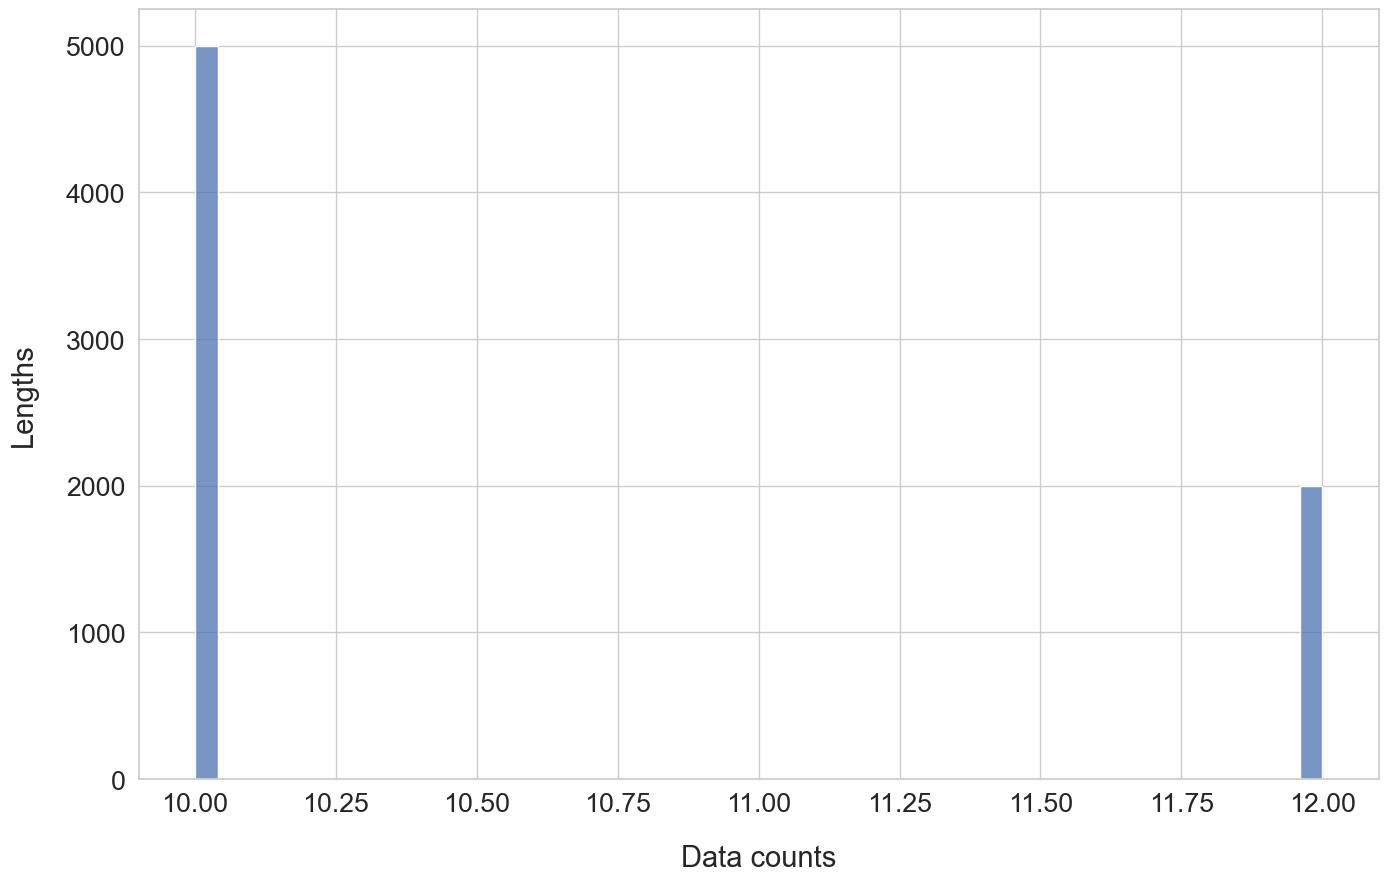

In [ ]:
# Audio length check 
raw_audio_data_path = glob("../data/unziped/*/train/*.wav") 
print("Total count :", len(raw_audio_data_path))

# Loding audio 
raw_audios = [librosa.load(i, sr = 16e3) for i in tqdm(raw_audio_data_path)]

# Getting lengths 
audio_len = [librosa.get_duration(y = i[0], sr = 16e3) for i in tqdm(raw_audios)]

# Plotting results 
seaborn.set_theme(style='whitegrid', font_scale = 1.75)

plt.figure(figsize=(16, 10))

seaborn.histplot(x=audio_len, bins=50)

plt.xlabel("Data counts", labelpad=20)
plt.ylabel("Lengths", labelpad=20)

plt.show()

In [7]:
# Audio length check "The wrong method"
raw_audio_data = glob("../data/unziped/*/train/*.wav") 
print("Total count :", len(raw_audio_data))

pre_vious_audio, _ = librosa.load(raw_audio_data[0], sr=16e3)
for i in tqdm(raw_audio_data): 
    audio, _ = librosa.load(raw_audio_data[0], sr=16e3)

    if len(pre_vious_audio) != len(audio): 
        print("Previous :", pre_vious_audio)
        print("Triggered :", audio)

        print("Path :", i)

Total count : 7000


  0%|          | 0/7000 [00:00<?, ?it/s]

In [14]:
# non_ano, _ = librosa.load("../data/unziped/ToyCar/train/section_00_source_train_normal_0001_car_B1_spd_31V_mic_1.wav", sr = 16e3)
# # np.shape(non_ano)

# np.shape(non_ano)[0] / 16e3

In [10]:
# non_ano, _ = librosa.load("../data/unziped/")
# np.shape(non_ano)

In [ ]:
import pandas as pd 

,file_name,d1p,d1v,d2p,d2v,d3p,d3v
0,ToyCar/train/section_00_source_train_normal_00...,car,B1,spd,31V,mic,1.wav
1,ToyCar/train/section_00_source_train_normal_00...,car,B1,spd,31V,mic,1.wav
2,ToyCar/train/section_00_source_train_normal_00...,car,B1,spd,31V,mic,1.wav
3,ToyCar/train/section_00_source_train_normal_00...,car,B1,spd,31V,mic,1.wav
4,ToyCar/train/section_00_source_train_normal_00...,car,B1,spd,31V,mic,1.wav
...,...,...,...,...,...,...,...
1195,ToyCar/test/section_00_source_test_normal_0011...,car,B1,spd,34V,mic,1.wav
1196,ToyCar/test/section_00_source_test_normal_0012...,car,B1,spd,34V,mic,1.wav
1197,ToyCar/test/section_00_source_test_normal_0013...,car,B1,spd,34V,mic,1.wav
1198,ToyCar/test/section_00_source_test_normal_0014...,car,B2,spd,40V,mic,1.wav


In [2]:
tmp = "../data/unziped/ToyCar/train/section_00_source_train_normal_0001_car_B1_spd_31V_mic_1.wav"
tmp.split("_")[2]

'source'

In [22]:
import pickle as pkl

pkl_path = "./data/raw_samples/train_sr_16e3.pkl"

path = glob("../data/unziped/*/train/*.wav")
print("Found file counts :", len(path))

# Loading raw data
print("="*20, "Loading data", "="*20)
# audio_data = [[librosa.load(i, sr=16e3)[0], i.split("/")[3]] for i in tqdm(path)]
with open(pkl_path, 'rb') as f:
    audio_data = pkl.load(f)
print(".pkl data has been loaded")
print("Loaded data path :", pkl_path)

# Resizeing feature
print("Resizeing image ...")
crop_sec = 5
audio_data = [i[0][:int(16e3) * crop_sec] for i in tqdm(audio_data)]


Found file counts : 7000
==================== Loading data ====================
.pkl data has been loaded
Loaded data path : ./data/raw_samples/train_sr_16e3.pkl
Resizeing image ...


  0%|          | 0/7000 [00:00<?, ?it/s]

In [17]:
import pickle as pkl

pkl_path = "./data/raw_samples/train_sr_16e3.pkl"
domain=0

# Loading raw data
print("="*20, "Loading data", "="*20)
# audio_data = [[librosa.load(i, sr=16e3)[0], i.split("/")[3]] for i in tqdm(path)]
with open(pkl_path, 'rb') as f:
    raw_data = pkl.load(f)
print(".pkl data has been loaded")
print("Loaded data path :", pkl_path)

# Resizeing feature
print("Resizeing image ...")
crop_sec = 5
audio_data = [np.array(i[0][0:int(16e3) * crop_sec]) for i in tqdm(raw_data) if i[2] == domain]
# audio_data = []
# for i in raw_data:
#     if i[2] == domain:
#         # print(i[0])
#         audio_data.append(i[0][0:int(16e3) * crop_sec])

audio_len = [len(i) for i in audio_data]
if len(set(audio_len)) != 1: print("ERRORERRORERRORERRORERRORERRORERROR")

# audio_data = np.ndarray(audio_data)

# Feature extraction 
print("="*20, "Extracting features", "="*20)
feature_data = [librosa.feature.mfcc(y = i, sr = 16e3, n_mfcc = 128,) for i in tqdm(audio_data)]

# Label 
label_data = [i[1] for i in raw_data if i[2] == domain]

==================== Loading data ====================
.pkl data has been loaded
Loaded data path : ./data/raw_samples/train_sr_16e3.pkl
Resizeing image ...


  0%|          | 0/7000 [00:00<?, ?it/s]

==================== Extracting features ====================


  0%|          | 0/6930 [00:00<?, ?it/s]

In [49]:
raw_data[0][0]

array([-0.00759888,  0.00213623, -0.02905273, ..., -0.0213623 ,
        0.00204468,  0.0005188 ], dtype=float32)

In [18]:
set([np.shape(i) for i in feature_data])

{(128, 157)}

In [ ]:
len(feature_data) == len(label_data)

6930

In [7]:
set(audio_len)

{160000, 192000}

In [2]:
import pickle as pkl

pkl_path = "./data/raw_samples/train_sr_16e3.pkl"
domain=0

# Loading raw data
print("="*20, "Loading data", "="*20)
# audio_data = [[librosa.load(i, sr=16e3)[0], i.split("/")[3]] for i in tqdm(path)]
with open(pkl_path, 'rb') as f:
    raw_data = pkl.load(f)
print(".pkl data has been loaded")
print("Loaded data path :", pkl_path)

# Resizeing feature
print("Resizeing image ...")
crop_sec = 5
audio_data = [np.array(i[0][0:int(16e3) * crop_sec]) for i in tqdm(raw_data) if i[2] == domain]
# audio_data = []
# for i in raw_data:
#     if i[2] == domain:
#         # print(i[0])
#         audio_data.append(i[0][0:int(16e3) * crop_sec])

audio_len = [len(i) for i in audio_data]
if len(set(audio_len)) != 1: print("ERRORERRORERRORERRORERRORERRORERROR")

# audio_data = np.ndarray(audio_data)

# Feature extraction 
print("="*20, "Extracting features", "="*20)
feature_data = [librosa.feature.mfcc(y = i, sr = 16e3, n_mfcc = 128,) for i in tqdm(audio_data)]

# Label 
label_data = [i[1] for i in raw_data if i[2] == domain]

==================== Loading data ====================
.pkl data has been loaded
Loaded data path : ./data/raw_samples/train_sr_16e3.pkl
Resizeing image ...


  0%|          | 0/7000 [00:00<?, ?it/s]

==================== Extracting features ====================


  0%|          | 0/6930 [00:00<?, ?it/s]

In [21]:
tmp = raw_data[0][0][:int(16e3) * 4]

np.shape(librosa.feature.mfcc(y = tmp, sr = 16e3, n_mfcc = 128,))

(128, 126)

In [5]:
from glob import glob

path = glob("../../data/unziped/*/train/*.wav")
len(path)

0